In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
from sklearn.utils import shuffle
import csv
from datetime import datetime
import sys
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_output_file = "/content/kiln_train_balanced_1_1.npz"
val_output_file = "/content/kiln_val_balanced_1_1.npz"
test_output_file = "/content/kiln_test_balanced_1_1.npz"

try:
    print(f"\nLoading BALANCED training data from {train_output_file}...")
    train_data = np.load(train_output_file)
    X_train = train_data['X_train']
    y_train = train_data['y_train']
    print("Training data loaded successfully.")
    print(f"  X_train shape: {X_train.shape}")
    print(f"  y_train shape: {y_train.shape}")
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    print(f"  Training class distribution: {dict(zip(unique_train, counts_train))}")
except FileNotFoundError:
    print(f"Error: Training data file not found at {train_output_file}")
    sys.exit(1)
except Exception as e:
    print(f"Error loading training data: {e}")
    sys.exit(1)

try:
    print(f"\nLoading validation data from {val_output_file}...")
    val_data = np.load(val_output_file)
    X_val = val_data['X_val']
    y_val = val_data['y_val']
    print("Validation data loaded successfully.")
    print(f"  X_val shape: {X_val.shape}")
    print(f"  y_val shape: {y_val.shape}")
    unique_val, counts_val = np.unique(y_val, return_counts=True)
    print(f"  Validation class distribution: {dict(zip(unique_val, counts_val))}")
except FileNotFoundError:
    print(f"Error: Validation data file not found at {val_output_file}")
    sys.exit(1)
except Exception as e:
    print(f"Error loading validation data: {e}")
    sys.exit(1)

try:
    print(f"\nLoading test data from {test_output_file}...")
    test_data = np.load(test_output_file)
    X_test = test_data['X_test']
    y_test = test_data['y_test']
    print("Test data loaded successfully.")
    print(f"  X_test shape: {X_test.shape}")
    print(f"  y_test shape: {y_test.shape}")
    unique_test, counts_test = np.unique(y_test, return_counts=True)
    print(f"  Test class distribution: {dict(zip(unique_test, counts_test))}")
except FileNotFoundError:
    print(f"Error: Test data file not found at {test_output_file}")
    sys.exit(1)
except Exception as e:
    print(f"Error loading test data: {e}")
    sys.exit(1)

print("\n--- All datasets loaded ---")


Loading BALANCED training data from /content/kiln_train_balanced_1_1.npz...
Training data loaded successfully.
  X_train shape: (1491, 64, 64, 3)
  y_train shape: (1491,)
  Training class distribution: {np.int32(0): np.int64(745), np.int32(1): np.int64(746)}

Loading IMBALANCED validation data from /content/kiln_val_balanced_1_1.npz...
Validation data loaded successfully.
  X_val shape: (319, 64, 64, 3)
  y_val shape: (319,)
  Validation class distribution: {np.int32(0): np.int64(160), np.int32(1): np.int64(159)}

Loading IMBALANCED test data from /content/kiln_test_balanced_1_1.npz...
Test data loaded successfully.
  X_test shape: (320, 64, 64, 3)
  y_test shape: (320,)
  Test class distribution: {np.int32(0): np.int64(160), np.int32(1): np.int64(160)}

--- All datasets loaded ---


In [ ]:
print("Generating synthetic data for demonstration...")
IMG_HEIGHT, IMG_WIDTH = 64, 64
NUM_TRAIN_SAMPLES = 500
NUM_VAL_SAMPLES = 100

# Generate random image-like data and binary labels
X_train = np.random.rand(NUM_TRAIN_SAMPLES, IMG_HEIGHT, IMG_WIDTH, 3).astype(np.float32)
y_train = np.random.randint(0, 2, size=(NUM_TRAIN_SAMPLES, 1)).astype(np.float32)

X_val = np.random.rand(NUM_VAL_SAMPLES, IMG_HEIGHT, IMG_WIDTH, 3).astype(np.float32)
y_val = np.random.randint(0, 2, size=(NUM_VAL_SAMPLES, 1)).astype(np.float32)




===== Starting Run 1 (ResNet50V2): Phase 1 Only =====
--- Starting Experiment: ResNet50V2_Phase1_Only ---
Configuration: Run Phase 2 = False
Base Model: ResNet50V2, Fine-tune from: N/A
Epochs: Phase 1=100, Phase 2=N/A
LRs: Phase 1=0.0001, Phase 2=N/A
Batch Size: 64, Patience: 10
Training shape: (1491, 64, 64, 3), Validation shape: (319, 64, 64, 3)
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

Base ResNet50V2 model loaded. Trainable status: False

Model defined:


Model: "ResNet50V2_transfer_clf"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 64, 64, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 2, 2, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,566,849 (89.90 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,564,800 (89.89 MB)


Model compiled for Phase 1 (lr=0.0001).

--- Starting Training Phase 1 ---
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4977 - auc: 0.4893 - loss: 0.8447 - precision: 0.5009 - recall: 0.5302
Epoch 1: val_auc improved from -inf to 0.54365, saving model to ./resnet50v2_training_runs/best_ResNet50V2_Phase1_Only_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.4978 - auc: 0.4899 - loss: 0.8441 - precision: 0.5010 - recall: 0.5307 - val_accuracy: 0.5266 - val_auc: 0.5437 - val_loss: 0.7337 - val_precision: 0.5220 - val_recall: 0.5975
Epoch 2/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4953 - auc: 0.5182 - loss: 0.7906 - precision: 0.5003 - recall: 0.5489
Epoch 2: val_auc improved from 0.54365 to 0.57642, saving model to ./resnet50v2_training_runs/best_ResNet50V2_Phase1_Only_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.4952 - auc: 0.5176 - loss: 0.7919 - precision: 0.4998 - recall: 0.5476 - val_accuracy: 0.5643 - val

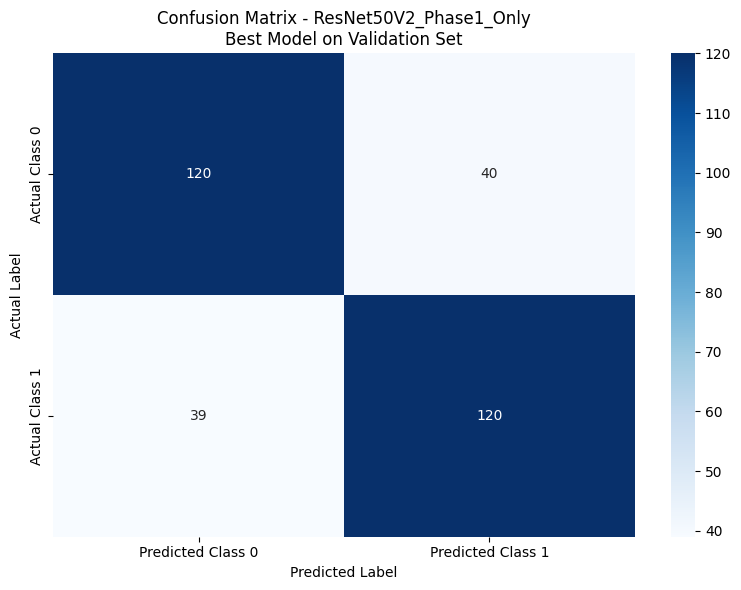


--- Experiment ResNet50V2_Phase1_Only Finished ---

Run 1 (ResNet50V2_Phase1_Only) finished.
Final Validation Results (Best Model from Phase 1): {'loss': 0.507077693939209, 'accuracy': 0.7523511052131653, 'precision': 0.75, 'recall': 0.7547169923782349, 'auc': 0.8394261598587036}


===== Starting Run 2 (ResNet50V2): Phase 1 and Phase 2 =====
--- Starting Experiment: ResNet50V2_Phase1_and_2 ---
Configuration: Run Phase 2 = True
Base Model: ResNet50V2, Fine-tune from: conv5_block2_preact_bn
Epochs: Phase 1=100, Phase 2=30
LRs: Phase 1=0.0001, Phase 2=1e-05
Batch Size: 64, Patience: 10
Training shape: (1491, 64, 64, 3), Validation shape: (319, 64, 64, 3)

Base ResNet50V2 model loaded. Trainable status: False

Model defined:


Model: "ResNet50V2_transfer_clf"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ (None, 64, 64, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 2, 2, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,566,849 (89.90 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,564,800 (89.89 MB)


Model compiled for Phase 1 (lr=0.0001).

--- Starting Training Phase 1 ---
Epoch 1/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4749 - auc: 0.4958 - loss: 1.0205 - precision: 0.4774 - recall: 0.7791
Epoch 1: val_auc improved from -inf to 0.49316, saving model to ./resnet50v2_training_runs/best_ResNet50V2_Phase1_and_2_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - accuracy: 0.4769 - auc: 0.4969 - loss: 1.0162 - precision: 0.4792 - recall: 0.7790 - val_accuracy: 0.4922 - val_auc: 0.4932 - val_loss: 0.8200 - val_precision: 0.4934 - val_recall: 0.7107
Epoch 2/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4756 - auc: 0.4815 - loss: 0.9367 - precision: 0.4791 - recall: 0.6871
Epoch 2: val_auc improved from 0.49316 to 0.51618, saving model to ./resnet50v2_training_runs/best_ResNet50V2_Phase1_and_2_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.4767 - auc: 0.4824 - loss: 0.9339 - precision: 0.4801 - recall: 0.6871 - val_accuracy: 0.5078 - v

Model: "ResNet50V2_transfer_clf"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ (None, 64, 64, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 2, 2, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,566,849 (89.90 MB)

 Trainable params: 8,935,425 (34.09 MB)

 Non-trainable params: 14,631,424 (55.81 MB)


--- Starting Training Phase 2 (Fine-tuning) ---
Epoch 101/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6441 - auc: 0.7515 - loss: 0.7113 - precision: 0.7414 - recall: 0.5875
Epoch 101: val_auc improved from -inf to 0.84395, saving model to ./resnet50v2_training_runs/best_ResNet50V2_Phase1_and_2_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.6442 - auc: 0.7503 - loss: 0.7124 - precision: 0.7407 - recall: 0.5860 - val_accuracy: 0.7712 - val_auc: 0.8439 - val_loss: 0.5149 - val_precision: 0.7722 - val_recall: 0.7673
Epoch 102/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6274 - auc: 0.6680 - loss: 0.7689 - precision: 0.6703 - recall: 0.4802
Epoch 102: val_auc did not improve from 0.84395
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6277 - auc: 0.6681 - loss: 0.7693 - precision: 0.6712 - recall: 0.4806 - val_accuracy: 0.7649 - val_auc: 0.8310 - val_loss: 0.5349 - val_precision: 0.7593 - val_recall: 0.7736
Epoch 103/130
23/24 ━━━━━━━━━

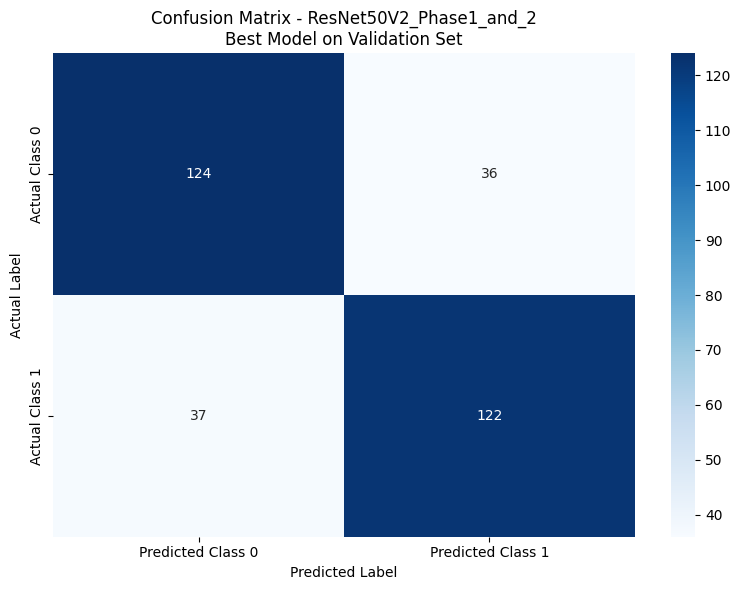


--- Experiment ResNet50V2_Phase1_and_2 Finished ---

Run 2 (ResNet50V2_Phase1_and_2) finished.
Final Validation Results (Best Model from Phase 1 & 2): {'loss': 0.5149024128913879, 'accuracy': 0.7711598873138428, 'precision': 0.7721518874168396, 'recall': 0.7672955989837646, 'auc': 0.843946635723114}


In [3]:
def train_resnet50v2_model(X_train, y_train, X_val, y_val,
                           run_phase2=True,
                           experiment_name="ResNet50V2_Experiment",
                           save_dir="/content/",
                           epochs_phase1=100, # From original script
                           epochs_phase2=30,  # From original script
                           fine_tune_start_layer='conv5_block3_preact_bn', # From original script
                           initial_lr=1e-4,
                           fine_tune_lr=1e-5,
                           batch_size=64,
                           patience=10):
    """
    Trains a ResNet50V2 model using transfer learning and optional fine-tuning.

    Generates a confusion matrix and classification report for the best
    performing model on the validation set at the end of training.

    Args:
        X_train: Training image data (NumPy array, e.g., shape (N, H, W, C)).
        y_train: Training labels (NumPy array, e.g., shape (N, 1) or (N,)).
        X_val: Validation image data (NumPy array).
        y_val: Validation labels (NumPy array).
        run_phase2 (bool): If True, performs both Phase 1 (transfer learning)
                           and Phase 2 (fine-tuning). If False, only performs
                           Phase 1. Defaults to True.
        experiment_name (str): Name for the experiment, used for saving the model
                               and output files. Defaults to "ResNet50V2_Experiment".
        save_dir (str): Directory to save the best model checkpoint and the
                        confusion matrix plot. Defaults to "/content/".
        epochs_phase1 (int): Max epochs for Phase 1 (transfer learning).
        epochs_phase2 (int): Max additional epochs for Phase 2 (fine-tuning).
        fine_tune_start_layer (str): Name of the layer in the base model from
                                     which to start fine-tuning (unfreezing).
                                     Defaults to 'conv5_block3_preact_bn'.
        initial_lr (float): Learning rate for Phase 1.
        fine_tune_lr (float): Learning rate for Phase 2 (fine-tuning).
        batch_size (int): Batch size for training and evaluation.
        patience (int): Patience for Early Stopping (monitoring 'val_auc').


    Returns:
        tuple: (best_model, combined_history, val_results_dict)
            - best_model: The loaded Keras model with the best weights found
                          during training (based on val_auc). Returns None if
                          model loading fails.
            - combined_history: A dictionary containing the training history
                              (loss, acc, etc.) for all completed epochs.
            - val_results_dict: A dictionary containing the evaluation metrics
                               of the best model on the validation set. Empty
                               if evaluation fails.
    """
    BASE_MODEL_NAME = "ResNet50V2"
    INITIAL_LR_PHASE1 = initial_lr
    FINE_TUNE_LR = fine_tune_lr
    FINE_TUNE_START_LAYER_NAME = fine_tune_start_layer
    BATCH_SIZE = batch_size
    EPOCHS_PHASE_1 = epochs_phase1
    EPOCHS_PHASE_2 = epochs_phase2
    PATIENCE_EARLY_STOPPING = patience
    OPTIMIZER_NAME = "Adam"

    print(f"--- Starting Experiment: {experiment_name} ---")
    print(f"Configuration: Run Phase 2 = {run_phase2}")
    print(f"Base Model: {BASE_MODEL_NAME}, Fine-tune from: {FINE_TUNE_START_LAYER_NAME if run_phase2 else 'N/A'}")
    print(f"Epochs: Phase 1={EPOCHS_PHASE_1}, Phase 2={EPOCHS_PHASE_2 if run_phase2 else 'N/A'}")
    print(f"LRs: Phase 1={INITIAL_LR_PHASE1}, Phase 2={FINE_TUNE_LR if run_phase2 else 'N/A'}")
    print(f"Batch Size: {BATCH_SIZE}, Patience: {PATIENCE_EARLY_STOPPING}")

    print(f"Training shape: {X_train.shape}, Validation shape: {X_val.shape}")
    if y_train.ndim > 1 and y_train.shape[1] > 1:
         print("Warning: y_train seems to be one-hot encoded. Ensure loss is appropriate (e.g., CategoricalCrossentropy). This code uses BinaryCrossentropy.")
    if y_val.ndim > 1 and y_val.shape[1] > 1:
         print("Warning: y_val seems to be one-hot encoded. This code expects binary labels (0 or 1).")

    input_shape = X_train.shape[1:]

    os.makedirs(save_dir, exist_ok=True)
    model_checkpoint_path = os.path.join(save_dir, f"best_{experiment_name}_model.keras")

    # Load Pre-trained ResNet50V2 Base
    base_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        input_shape=input_shape,
        include_top=False)

    base_model.trainable = False
    print(f"\nBase {BASE_MODEL_NAME} model loaded. Trainable status: {base_model.trainable}")

    # Define Augmentation and Classifier Head
    inputs = keras.Input(shape=input_shape)
    x = layers.RandomFlip("horizontal_and_vertical")(inputs)
    x = layers.RandomRotation(factor=0.14)(x)
    x = layers.RandomTranslation(height_factor=0.1, width_factor=0.1)(x)
    x = tf.keras.applications.resnet_v2.preprocess_input(x)

    base_model_output = base_model(x, training=False)
    pooled_output = layers.GlobalAveragePooling2D()(base_model_output)
    dropped_output = layers.Dropout(0.5)(pooled_output)
    outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(dropped_output)

    model = keras.Model(inputs, outputs, name=f"{BASE_MODEL_NAME}_transfer_clf")
    print("\nModel defined:")
    model.summary()

    metrics = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=INITIAL_LR_PHASE1),
        loss='binary_crossentropy',
        metrics=metrics
    )
    print(f"\nModel compiled for Phase 1 (lr={INITIAL_LR_PHASE1}).")

    # --- Define Callbacks ---
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_auc',
        patience=PATIENCE_EARLY_STOPPING,
        mode='max',
        restore_best_weights=True,
        verbose=1
    )
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=model_checkpoint_path,
        monitor='val_auc',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    # Liner-probe training
    print("\n--- Starting Training Phase 1 ---")
    history_phase1 = model.fit(
        X_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS_PHASE_1,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, model_checkpoint]
    )
    print("\n--- Finished Training Phase 1 ---")
    actual_epochs_phase1 = len(history_phase1.history['loss'])
    combined_history = {key: list(val) for key, val in history_phase1.history.items()}

    # Fine-Tuning
    if run_phase2:
        print("\n--- Preparing for Fine-Tuning (Phase 2) ---")

        print(f"Loading best weights from Phase 1 checkpoint: {model_checkpoint_path}")
        try:
            model.load_weights(model_checkpoint_path)
            print("Best weights from Phase 1 loaded into current model for fine-tuning.")
        except Exception as e:
            print(f"Warning: Could not load weights from {model_checkpoint_path}. "
                  f"Proceeding with weights from end of Phase 1 training. Error: {e}")

        base_model.trainable = True
        layer_found = False
        print(f"Attempting to unfreeze layers from {FINE_TUNE_START_LAYER_NAME} onwards...")
        for layer in base_model.layers:
            if layer.name == FINE_TUNE_START_LAYER_NAME:
                layer_found = True
            if not layer_found:
                 layer.trainable = False
            else:
                 layer.trainable = True

        if not layer_found:
            print(f"Warning: Fine-tuning start layer '{FINE_TUNE_START_LAYER_NAME}' not found in base model '{BASE_MODEL_NAME}'. "
                  "Check layer names. Proceeding with ALL base model layers trainable for fine-tuning.")
        else:
             print(f"Base model layers unfrozen from {FINE_TUNE_START_LAYER_NAME} onwards.")

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=FINE_TUNE_LR),
            loss='binary_crossentropy',
            metrics=metrics
        )
        print(f"\nModel re-compiled for fine-tuning (lr={FINE_TUNE_LR}).")
        print("Model summary after unfreezing layers for fine-tuning:")
        model.summary()

        print("\n--- Starting Training Phase 2 (Fine-tuning) ---")
        if actual_epochs_phase1 < EPOCHS_PHASE_1:
             print(f"Note: Phase 1 stopped early after {actual_epochs_phase1} epochs.")

        total_epochs_target = actual_epochs_phase1 + EPOCHS_PHASE_2

        early_stopping_p2 = tf.keras.callbacks.EarlyStopping(
            monitor='val_auc', patience=PATIENCE_EARLY_STOPPING, mode='max',
            restore_best_weights=True, verbose=1
        )
        model_checkpoint_p2 = tf.keras.callbacks.ModelCheckpoint(
            filepath=model_checkpoint_path, monitor='val_auc', mode='max',
            save_best_only=True, verbose=1
        )

        history_phase2 = model.fit(
            X_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=total_epochs_target,
            initial_epoch=actual_epochs_phase1,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping_p2, model_checkpoint_p2]
        )
        print("\n--- Finished Training Phase 2 ---")

        for key in combined_history.keys():
            if key in history_phase2.history:
                combined_history[key].extend(history_phase2.history[key])
    else:
        print("\n--- Skipping Phase 2 (Fine-tuning) as requested ---")

    print(f"\nLoading best overall model saved to {model_checkpoint_path} for final evaluation...")
    best_model = None
    try:
        best_model = keras.models.load_model(model_checkpoint_path)
        print("Best model loaded successfully.")
    except Exception as e:
        print(f"Error loading the best model from {model_checkpoint_path}. Cannot proceed. Error: {e}")
        return None, combined_history, {}

    EXPECTED_METRIC_NAMES = ['loss', 'accuracy', 'precision', 'recall', 'auc']
    print("\nEvaluating best model on validation data (X_val)...")
    val_results_dict = {}
    try:
        val_results_list = best_model.evaluate(X_val, y_val, batch_size=BATCH_SIZE, verbose=0)
        print("\nBest Model Validation Metrics:")
        metric_names_from_model = best_model.metrics_names
        if len(metric_names_from_model) == len(val_results_list):
             for name, value in zip(metric_names_from_model, val_results_list):
                 print(f"  {name}: {value:.4f}")
                 val_results_dict[name.split(':')[-1]] = value # Use cleaned name as key
        elif len(EXPECTED_METRIC_NAMES) == len(val_results_list):
             print("Note: Using expected metric names as model names didn't match result length.")
             for name, value in zip(EXPECTED_METRIC_NAMES, val_results_list):
                print(f"  {name}: {value:.4f}")
                val_results_dict[name] = value
        else:
            print(f"Warning: Mismatch between metric names and evaluation results length.")
            print(f"  Model metrics names: {metric_names_from_model}")
            print(f"  Evaluation results: {val_results_list}")
            if len(val_results_list) > 0:
                val_results_dict['loss'] = val_results_list[0]
                print(f"  loss (assigned): {val_results_list[0]:.4f}")
    except NameError as ne:
         print(f"Error: Validation data (X_val, y_val) not defined or accessible. {ne}")
         val_results_dict = {name: None for name in EXPECTED_METRIC_NAMES}
    except Exception as e:
         print(f"An error occurred during final validation evaluation: {e}")
         val_results_dict = {name: None for name in EXPECTED_METRIC_NAMES}

    print("\nGenerating Confusion Matrix & Classification Report for the best model on validation data...")
    try:
        y_pred_proba = best_model.predict(X_val, batch_size=BATCH_SIZE)
        y_pred = (y_pred_proba > 0.5).astype(int).flatten()

        if y_val.ndim > 1:
            if y_val.shape[1] == 1:
                 y_val_flat = y_val.flatten()
            else:
                 print(f"Warning: y_val has shape {y_val.shape}. Flattening for confusion matrix. Check label format.")
                 y_val_flat = y_val.flatten()
        else:
            y_val_flat = y_val

        print("\nClassification Report (Validation Set):")
        target_names = ['Class 0', 'Class 1']
        try:
             print(classification_report(y_val_flat, y_pred, target_names=target_names))
        except ValueError as ve:
             print(f"Could not generate classification report. Error: {ve}")
             print(f"Unique true labels: {np.unique(y_val_flat)}, Unique predicted labels: {np.unique(y_pred)}")

        cm = confusion_matrix(y_val_flat, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Predicted {target_names[0]}', f'Predicted {target_names[1]}'],
                    yticklabels=[f'Actual {target_names[0]}', f'Actual {target_names[1]}'])
        plt.title(f'Confusion Matrix - {experiment_name}\nBest Model on Validation Set')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

        cm_save_path = os.path.join(save_dir, f"confusion_matrix_{experiment_name}.png")
        try:
            plt.savefig(cm_save_path)
            print(f"Confusion matrix plot saved to: {cm_save_path}")
        except Exception as e:
            print(f"Error saving confusion matrix plot: {e}")
        plt.show()

    except NameError as ne:
        print(f"Error: Could not generate confusion matrix. Data (X_val, y_val) or model not available? {ne}")
    except Exception as e:
        print(f"An error occurred during confusion matrix generation: {e}")

    print(f"\n--- Experiment {experiment_name} Finished ---")
    return best_model, combined_history, val_results_dict



RESULTS_DIR_RESNET = "./resnet50v2_training_runs"

#Run 1: Phase 1 Only
print("\n\n===== Starting Run 1 (ResNet50V2): Phase 1 Only =====")
exp1_name_resnet = "ResNet50V2_Phase1_Only"
model_r_p1, history_r_p1, results_r_p1 = train_resnet50v2_model(
    X_train, y_train, X_val, y_val,
    run_phase2=False,
    experiment_name=exp1_name_resnet,
    save_dir=RESULTS_DIR_RESNET
)

if model_r_p1:
    print(f"\nRun 1 ({exp1_name_resnet}) finished.")
    print("Final Validation Results (Best Model from Phase 1):", results_r_p1)
else:
    print(f"\nRun 1 ({exp1_name_resnet}) potentially failed (check logs).")


# --- Run 2: Phase 1 + Phase 2 ---
print("\n\n===== Starting Run 2 (ResNet50V2): Phase 1 and Phase 2 =====")
exp2_name_resnet = "ResNet50V2_Phase1_and_2"
model_r_p1p2, history_r_p1p2, results_r_p1p2 = train_resnet50v2_model(
    X_train, y_train, X_val, y_val,
    run_phase2=True,
    experiment_name=exp2_name_resnet,
    save_dir=RESULTS_DIR_RESNET,
    fine_tune_start_layer='conv5_block2_preact_bn'
)

if model_r_p1p2:
    print(f"\nRun 2 ({exp2_name_resnet}) finished.")
    print("Final Validation Results (Best Model from Phase 1 & 2):", results_r_p1p2)
else:
     print(f"\nRun 2 ({exp2_name_resnet}) potentially failed (check logs).")